In [406]:
#configurando o diretorio
import os
os.chdir("/Users/laura.nonato/Downloads/cursos/archive")

In [407]:
#carregando as bibliotecas
import pandas as pd

CARREGAMENTO DOS DADOS

In [408]:
#informações gerais sobre os pedidos
orders = pd.read_csv('olist_orders_dataset.csv')

In [409]:
#informações sobre avaliações dos pedidos
avaliacoes = pd.read_csv('olist_order_reviews_dataset.csv') 

In [410]:
#informações sobre os clientes 
clientes = pd.read_csv('olist_customers_dataset.csv')

In [411]:
#informações sobre os itens dos pedidos  
itens_pedidos = pd.read_csv('olist_order_items_dataset.csv')

In [412]:
#informações sobre os produtos
produtos = pd.read_csv('olist_products_dataset.csv')

In [413]:
#informações sobre os vendedores
vendedores = pd.read_csv('olist_sellers_dataset.csv')

In [414]:
#informações sobre pagamentos dos pedidos  
pagamentos = pd.read_csv('olist_order_payments_dataset.csv')

In [415]:
#tradução dos produtos para o portugues
traducao = pd.read_csv('product_category_name_translation.csv')

ENTENDENDO OS DADOS CARREGADOS

In [416]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [417]:
#nome das colunas 
list(orders.columns.values)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [418]:
#tipos de dados
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [419]:
#listando os possiveis valores missings na tabela orders
orders.apply(lambda x: sum(x.isnull()),axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [420]:
avaliacoes.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [421]:
pagamentos.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


PREPARACAO DO DATASET DA ANALISE: MERGE

Merge de todos os datasets referentes ao **consumidor**

In [422]:
consumidor = pd.merge(orders, avaliacoes, on='order_id')
consumidor = pd.merge(consumidor, pagamentos,on='order_id')
consumidor = pd.merge(consumidor, clientes,on='customer_id')
consumidor.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


Merge de todos os datasets referentes ao **vendedor**

In [423]:
itens_pedidos.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [424]:
produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [425]:
vendedores.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [426]:
vendedor_produto  = pd.merge(itens_pedidos,produtos,on='product_id') #join de items pedidos e produtos por id do produto 
vendedor_produto  = pd.merge(vendedor_produto,vendedores,on='seller_id') #join dos produtos pedidos com a tabela de vendedores por seller_id
vendedor_produto  = pd.merge(vendedor_produto,traducao,on='product_category_name')
vendedor_produto .head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff


Merge dos datasets do **consumidor e do vendedor**

In [427]:
df_ecommerce = pd.merge(consumidor, vendedor_produto, on = 'order_id')
df_ecommerce.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


SELEÇÃO DOS DADOS DO DATASET
restringindo o dataset para as colunas que realmente irei trabalhar a analise

In [428]:
df_ecommerce = df_ecommerce[['order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date',
                              'shipping_limit_date','payment_sequential','payment_type','payment_installments','payment_value',
                              'price','freight_value','product_category_name_english','product_name_lenght','product_description_lenght',
                              'product_photos_qty','review_score']]

In [429]:
#renomeio as colunas com dicionarios
df_ecommerce = df_ecommerce.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length',
                                            'product_category_name_english': 'product_category'})

In [430]:
df_ecommerce.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5


In [431]:
#tamanho do dataset final
df_ecommerce.shape

(115609, 16)

limpeza e pré processamento do dataset

In [432]:
#verifico os valores nulos em toda tabela 
df_ecommerce.isnull().sum()

order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2400
order_estimated_delivery_date       0
shipping_limit_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
price                               0
freight_value                       0
product_category                    0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
review_score                        0
dtype: int64

In [433]:
#removo os valores nulos
df_ecommerce.dropna(how='any',inplace=True)

In [434]:
#converto o timestamp para date, precisarei apenas do formato de data dos pedidos
cols = ['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'shipping_limit_date']
for col in cols:
    df_ecommerce[col] = pd.to_datetime(df_ecommerce[col]).dt.date

In [435]:
#exclui o horario e deixa apenas o tipo date
df_ecommerce['order_purchase_timestamp'] = pd.to_datetime(df_ecommerce['order_purchase_timestamp']).dt.date
df_ecommerce['order_estimated_delivery_date'] = pd.to_datetime(df_ecommerce['order_estimated_delivery_date']).dt.date
df_ecommerce['order_delivered_customer_date'] = pd.to_datetime(df_ecommerce['order_delivered_customer_date']).dt.date
df_ecommerce['shipping_limit_date'] = pd.to_datetime(df_ecommerce['shipping_limit_date']).dt.date

In [436]:
df_ecommerce['shipping_limit_date']

0         2017-10-06
1         2017-10-06
2         2017-10-06
3         2018-07-30
4         2018-08-13
             ...    
115604    2018-02-12
115605    2017-09-05
115606    2018-01-12
115607    2018-01-12
115608    2018-03-15
Name: shipping_limit_date, Length: 113209, dtype: object

In [437]:
#em relação a entrega dos pedidos, acrescentarei colunas que serao uteis para analise: 
# qt dias da entrega e qt de dias estimados para entrega
df_ecommerce['delivery_days'] = df_ecommerce['order_delivered_customer_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['estimated_days'] = df_ecommerce['order_estimated_delivery_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['shipping_days'] = df_ecommerce['shipping_limit_date'] - df_ecommerce['order_purchase_timestamp']

In [438]:
df_ecommerce['shipping_days']

0        4 days
1        4 days
2        4 days
3        6 days
4        5 days
          ...  
115604   6 days
115605   9 days
115606   4 days
115607   4 days
115608   7 days
Name: shipping_days, Length: 113209, dtype: timedelta64[ns]

O resultado é uma string, ou seja, um texto (1 days, 2 days). Precisamos que seja um valor inteiro (1, 2,) para que o algoritmo entenda melhor a nossa análise. Por isso. transformaremos o timedelta em um valor inteiro.

In [439]:
cols = ['delivery_days', 'estimated_days', 'shipping_days']
for col in cols:
    df_ecommerce[col] = df_ecommerce[col].apply(lambda x: x.days)

In [440]:
#seleciono a coluna apenas para confirmar a conversao do tipo de dado
df_ecommerce['delivery_days']

0          8
1          8
2          8
3         14
4          9
          ..
115604    22
115605    25
115606    17
115607    17
115608     8
Name: delivery_days, Length: 113209, dtype: int64

In [441]:
#antes de tudo, qual é o periodo que estamos analisando? verifico a data maxima e minima do pedido
df_ecommerce['order_delivered_customer_date'].max()

datetime.date(2018, 10, 17)

In [442]:
df_ecommerce['order_delivered_customer_date'].min()

datetime.date(2016, 10, 11)

estamos analisando pedidos entre 11/10/16 e 17/10/18 

In [443]:
#removo as colunas que nao utilizarei dado que extrai ate o momento as informações mais necessarias para a analise
df_ecommerce.drop(['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'shipping_limit_date'],axis=1,inplace=True)

ENTENDIMENTO RAPIDO DA TABELA FINAL

In [444]:
df_ecommerce.head(3)

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
1,delivered,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4


In [445]:
#quais são os status dos pedidos?
df_ecommerce.order_status.unique()

array(['delivered', 'canceled'], dtype=object)

In [446]:
#quais as categorias distintas dos produtos?
df_ecommerce.product_category.unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery',
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys', 'telephony',
       'health_beauty', 'electronics', 'baby', 'cool_stuff',
       'watches_gifts', 'air_conditioning', 'sports_leisure',
       'books_general_interest', 'construction_tools_construction',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'fashion_bags_accessories',
       'musical_instruments', 'construction_tools_lights',
       'books_technical', 'costruction_tools_garden', 'home_appliances',
       'market_place', 'agro_industry_and_commerce', 'party_supplies',
       'home_confort', 'cds_dvds_musicals',
       'industry_commerce_and_business', 'consoles_games',
       'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_shoes',
       'home_construct

In [447]:
#teste para filtrar da linha 2 a linha 4
df_ecommerce[2:4]

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
3,delivered,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,14,20,6


In [448]:
#carregamento das bibliotecas para visualizacao dos dados
import matplotlib.pyplot as plt

In [449]:
import seaborn as sns

<AxesSubplot:xlabel='review_score', ylabel='Count'>

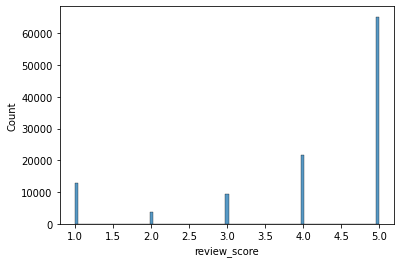

In [450]:
#distribuição das avaliacoes dos pedidos
sns.histplot(x='review_score', data=df_ecommerce)

<AxesSubplot:xlabel='payment_type', ylabel='Count'>

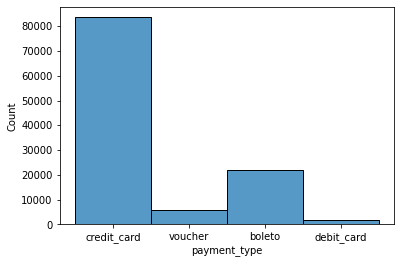

In [451]:
#histograma com a distribuição dos tipos de pagamento
sns.histplot( x='payment_type', data=df_ecommerce)


os pagamentos sao feitos majoritariamente por cartao de credito, seguindo de boleto
mas qual é o valor pago por tipo de pagamento?

In [452]:
fig_size = (18,8)
font_size = 16
title_font_size = 20

In [453]:
#funcao para criacao de grafico de barras automatica:
def bar_plot_df(x_var, y_var, title):
  # definição do tamanho das barras, letra, titulo, etc
  fig_size = (18,8)
  font_size = 16
  title_font_size = 20
  #especifica a criação do gráfico de barras
  fig = plt.figure(figsize = fig_size)
  sns.barplot(x = x_var, 
              y = y_var, data=df_ecommerce)
  plt.title(title, fontsize = title_font_size)
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)
  plt.show()

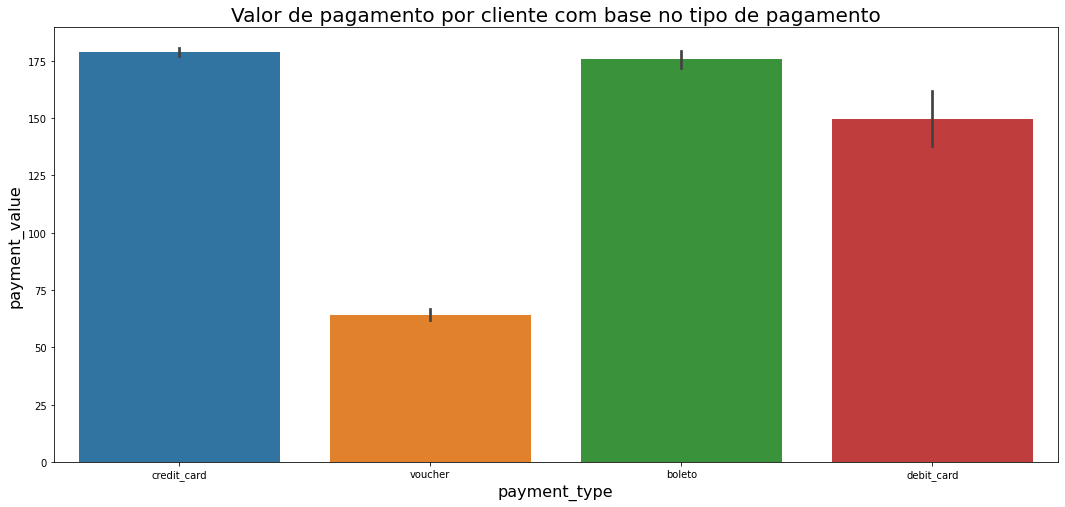

In [454]:
bar_plot_df('payment_type', 'payment_value', 'Valor de pagamento por cliente com base no tipo de pagamento')

estamos lidando com pedidos pagos majoritariamente por crédito, isso já sabiamos dado os graficos anteriores mas agora confirmamos que a media dos pagamentos por boleto e cartao de credito é de 175,00, em seguida da media do pagamento por cartao de debito (150,00) e os pagamentos por voucher tem a menor representatividade, até 75

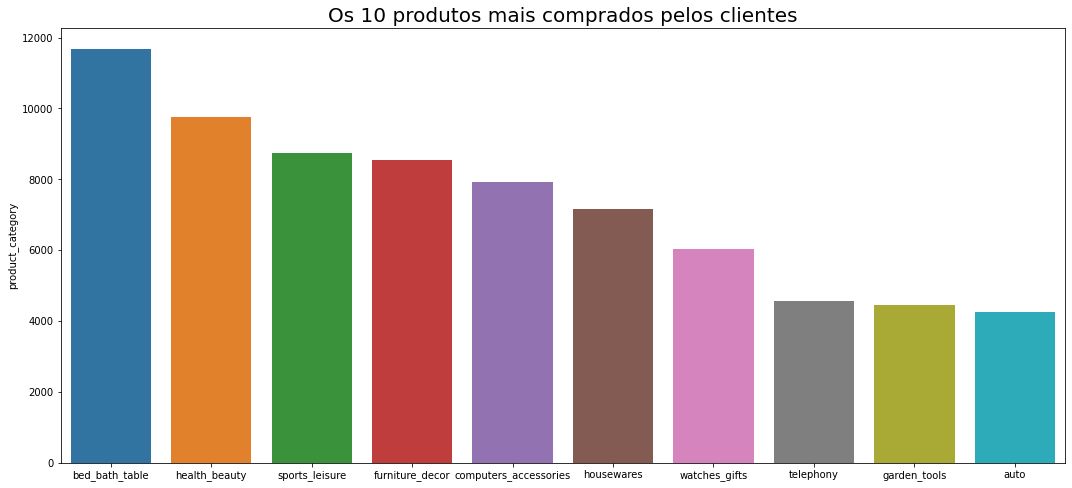

In [455]:
#10 categorias mais compradas pelos clientes (70 categorias no total)
fig = plt.figure(figsize = fig_size)
sns.barplot(x= df_ecommerce['product_category'].value_counts().index[:10],  #value counts contagem distinta, index limita 10 categorias
            y = df_ecommerce['product_category'].value_counts()[:10])

plt.title('Os 10 produtos mais comprados pelos clientes', fontsize = title_font_size) #configurando o titlo
plt.show()

esse grafico revela as categorias mais relevantes do ecommerce analisado: segmento doméstico. Se destacam as categorias de cama mesa e banho, beleza e saude, esporte e lazer e moveis decorativos respectivamente. Vale analisar os itens da categoria esporte e lazer e verificar se eles estão proximos do segmento para o lar, que aparenta ser o carro chefe desse e-commerce etc.

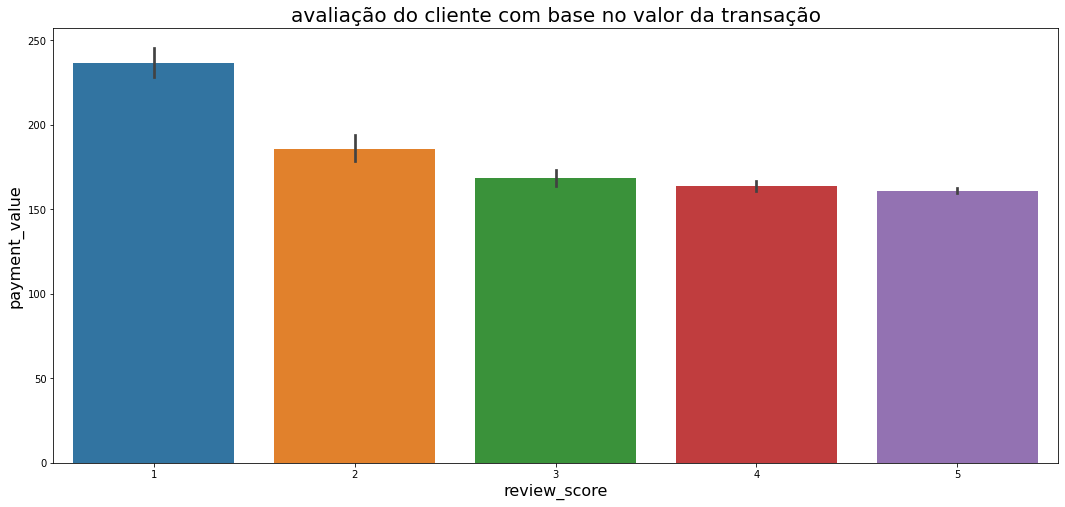

In [456]:
#qual é a avaliação do cliente com base no valor da transação?
bar_plot_df('review_score','payment_value','avaliação do cliente com base no valor da transação')

In [457]:
#para apoiar a analise dessas avaliações, vamos verificar o resumo estatistico dessa coluna payment_value
df_ecommerce['payment_value'].describe()

count    113209.000000
mean        171.570520
std         264.235129
min           0.000000
25%          60.850000
50%         107.980000
75%         189.150000
max       13664.080000
Name: payment_value, dtype: float64

ressalto que para analise de valor, estou considerando o payment_value (valor da transação) pois ele considera o valor pago de fato no pedido, após aplicação de descontos sobre o custo do item por exemplo, ou outras modificações operacionais no percuso da entrega.

171,00 é a media dos pagamentos, com uma mediana de 107,00. Essa variação pode ate ser esperada devido a diversidade de categorias, variação de preço, entre muitos indicadores que envolve preço como sensibilidade, por exemplo. No entanto, é interessante observar que 75% dos pagamentos corresponderam a 189,00, até maior que a média...

agora olhando para o gráfico, a avaliação aumenta um pouco à medida que o valor do pagamento diminui.

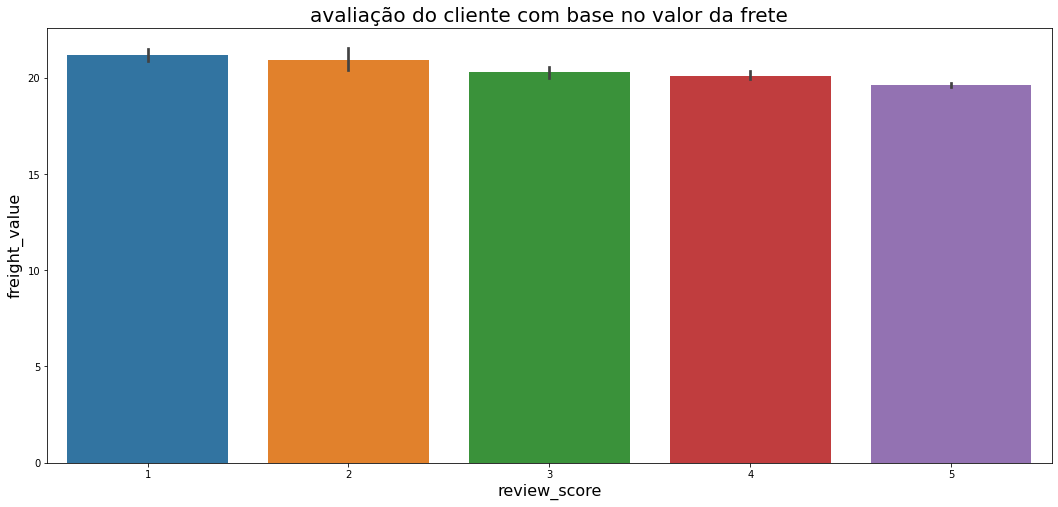

In [458]:
#e a avaliação do cliente com base no valor do frete?
bar_plot_df('review_score','freight_value','avaliação do cliente com base no valor da frete')

agora comparando a avaliação e o valor pago no frete não vemos diferença visível entre essas variáveis, em todas as avaliações a media do valor pago no frente foi de aprox 20,00. Assim, o valor do preço parece não ter efeito sobre a avaliação do consumidor. Geolocalização explica? multiplos centros de distribuição espalhados? operação, etc.

In [459]:
#apenas para ter uma ideia do resumo estatistico do preço pago no frete
df_ecommerce['freight_value'].describe()

#de todo o dataset a média do frente representa R$20,00 como vimos no gráfico, mas é interessante observar e confirmar que 75% dos fretes custam aprox R$21,00

count    113209.000000
mean         20.002512
std          15.710847
min           0.000000
25%          13.080000
50%          16.320000
75%          21.190000
max         409.680000
Name: freight_value, dtype: float64

<AxesSubplot:>

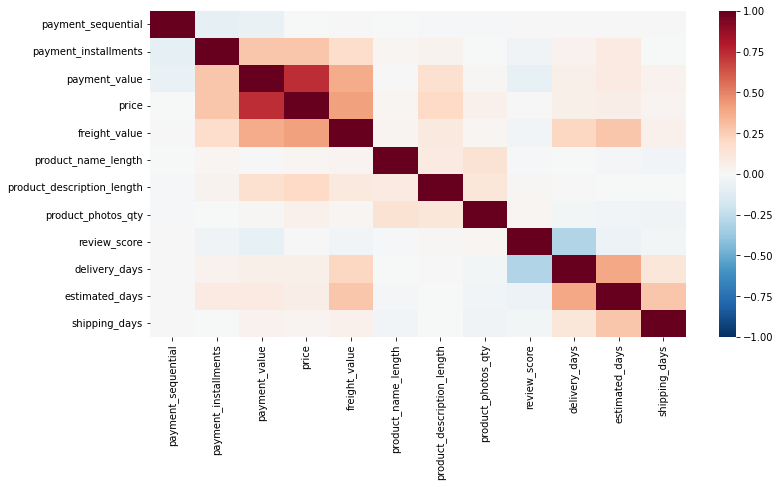

In [460]:
#agora vamos verificar de uma forma mais abrangente a correlacao entre as colunas dos dados
plt.figure(figsize=(12,6))
sns.heatmap(df_ecommerce.corr(), cmap='RdBu_r', vmin=-1, vmax=1) #RdBu_r red e blue

Com a correlação conseguimos ver rapidamente quanto uma variavel influencia sobre outra e com um gráfico de uma forma bastante rápida. 
A correlação pode ser positiva ou negativa (1 ou -1), no caso da positiva quanto maior uma variavel maior a segunda variavel em comparação.
Enquanto que a correlação negativa mostra que enquanto uma variável aumenta seu valor, a outra diminui (em vermelho, valores próximos a -1).
Quando uma variável não possui correlação uma com a outra, o valor é 0, que são as cores mais fracas.
Em estatistica a correlação é resumidamente a variância sobre o desvio padrão.

Nesse gráfico, conseguimos visualizar uma correlação linear na diagonal em situações da variável contra ela mesma.

Fica bastante evidente a correlação positiva entre preço e valor da transação por exemplo, obviamente ao aumentar o custo do item o valor da transação aumentará.
Seguindo a analise que estava fazendo acima, conseguimos ver que não há correlação entre valor da transação e avaliação do pedido ou valor do frete e o mesmo.


In [461]:
#o dataset com as correlações
df_ecommerce.corr()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
payment_sequential,1.000000,-0.087989,-0.065722,-0.000090,0.007141,-0.002185,-0.010642,-0.008289,0.005481,0.002953,0.005745,0.000967
payment_installments,-0.087989,1.000000,0.274616,0.279856,0.186215,0.020852,0.036227,-0.001525,-0.043281,0.043543,0.091077,-0.006342
payment_value,-0.065722,0.274616,1.000000,0.738738,0.372798,0.005470,0.157132,0.010169,-0.081249,0.060000,0.086235,0.043002
price,-0.000090,0.279856,0.738738,1.000000,0.412718,0.019767,0.200886,0.052912,0.003271,0.061138,0.069430,0.029856
freight_value,0.007141,0.186215,0.372798,0.412718,1.000000,0.025092,0.095269,0.022377,-0.033639,0.213635,0.274438,0.053767
product_name_length,-0.002185,0.020852,0.005470,0.019767,0.025092,1.000000,0.090189,0.144894,-0.013726,-0.002937,-0.015672,-0.032028
product_description_length,-0.010642,0.036227,0.157132,0.200886,0.095269,0.090189,1.000000,0.118754,0.014174,0.005885,-0.001681,-0.005305
product_photos_qty,-0.008289,-0.001525,0.010169,0.052912,0.022377,0.144894,0.118754,1.000000,0.021166,-0.026912,-0.032999,-0.042842
review_score,0.005481,-0.043281,-0.081249,0.003271,-0.033639,-0.013726,0.014174,0.021166,1.000000,-0.303157,-0.060847,-0.026093
delivery_days,0.002953,0.043543,0.060000,0.061138,0.213635,-0.002937,0.005885,-0.026912,-0.303157,1.000000,0.386065,0.119573


In [462]:
#correlacao entre valor da transacao e preço do produto
def scatter_plot_df(x_var, y_var, title):
  # definição do gráfico de dispersao
  fig = plt.figure(figsize = fig_size)
  sns.scatterplot(x = x_var,hue='review_score' #o hue é muito util pra diferenciar os pontos do grafico por determinada coluna, nesse caso a avaliacao
              ,y = y_var, data=df_ecommerce)
  plt.title(title, fontsize = title_font_size)
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)
  plt.show()

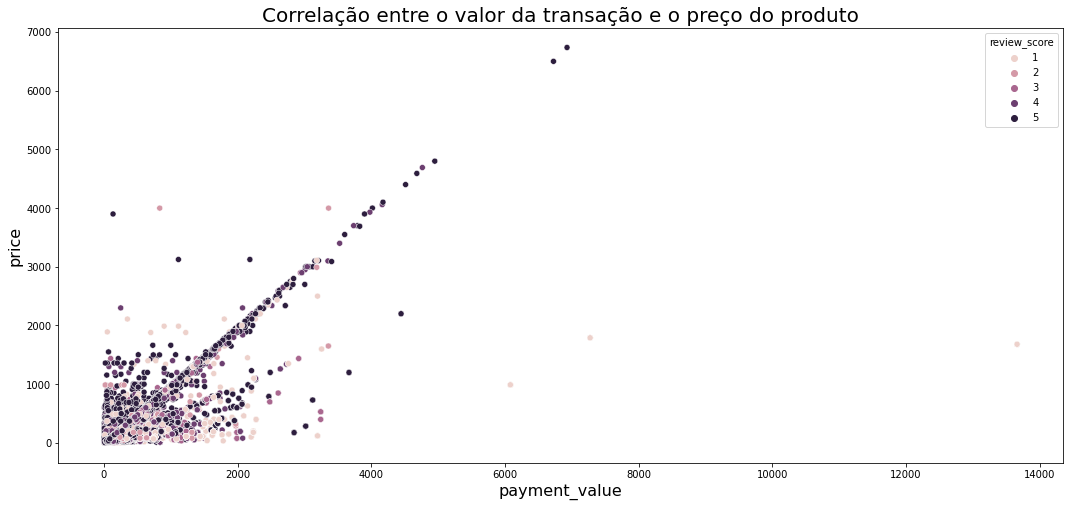

In [463]:
scatter_plot_df('payment_value','price','Correlação entre o valor da transação e o preço do produto')

com esse grafico fica mais facil ver os outliers ao plotar duas variaveis numericas. 
Exemplo, existem alguns itens fora da curva que mesmo custando mais de 400,00 tiveram ótimas avaliações, de score 5, outro ponto é que a maioria dos pontos mais claros, ou seja com score 1 representando baixas avaliações, estão concentrados nos preços mais baixos.

Além disso, a maior parte das boas avaliações (4 e 5) ocorre quando o valor do pagamento e preço tem o mesmo valor.

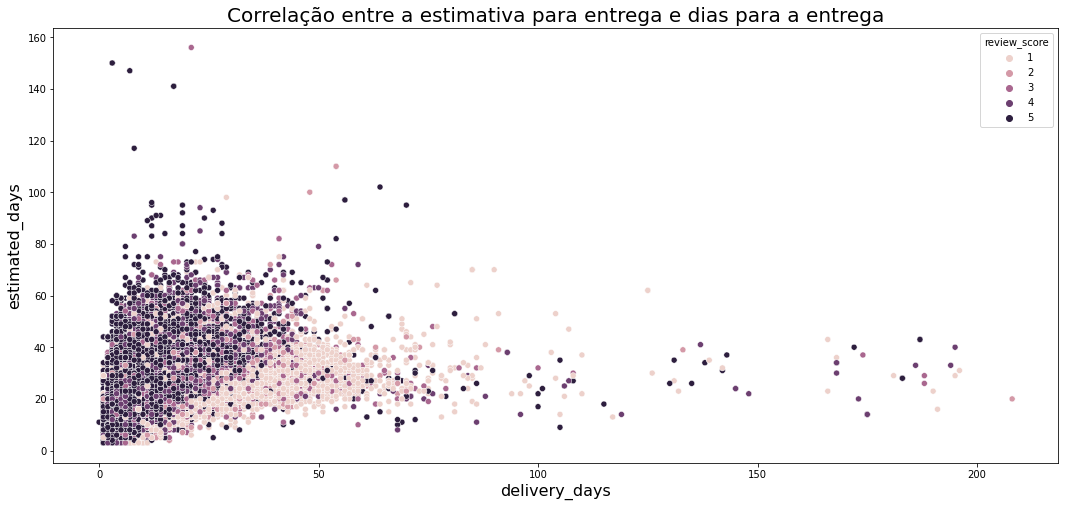

In [464]:
scatter_plot_df('delivery_days','estimated_days','Correlação entre a estimativa para entrega e dias para a entrega')

No x estão os dias para entrega e no y os dias estimados para entrega. Ao plotar essas duas variáveis mais operacionais, facilita a visualização de que os pedidos com alta avaliação foram entregues até antes que a estimativa de entrega. O atraso na entrega é muito importante para a definição de satisfação do cliente e com certeza será explorado no modelo para prever a satisfação do consumidor.
Entre as avaliações negativas de 1 e 2, a estimativa de entrega apontava para poucos dias mas os dias de entrega de fato passaram do tempo esperado pelo cliente.

**Etapa de Feature Engineering:**
passo a criar novas variaveis que facilitam a criação de um modelo de aprendizado de máquina

indicador de entrega do produto que sinaliza se este chegou atrasado ou no tempo estimado: **arrival time**

In [465]:
#crio uma coluna com os dias ate a entrega: diferença entre a qt de dias estimados para entrega e dias de entrega de fato
df_ecommerce['arrival_time'] = (df_ecommerce['estimated_days'] - df_ecommerce['delivery_days'])

In [466]:
df_ecommerce['arrival_time'].head(3)

0    8
1    8
2    8
Name: arrival_time, dtype: int64

In [467]:
#df_ecommerce['arrival_time'] = pd.to_datetime(df_ecommerce['arrival_time']).dt.date

In [468]:
#agora sim consigo criar a feature indicando se o pedido chegou atrasado ou não
#tecnicamente é aplicada uma função no momento da execução do codigo, como se fosse um def função x, sendo o x desconhecido: se o valor arrival time for negativo <0 mas se for no tempo ideal = 1
df_ecommerce['arrival_time'] = df_ecommerce.arrival_time.apply(lambda x: 0 if x < 0 else 1)

indicador de avaliação sinaliza se foi boa ou ruim

In [469]:
#excluo as avaliações 3, que é neutra
df_ecommerce.drop(df_ecommerce[df_ecommerce['review_score'] == 3].index, inplace=True)

In [470]:
df_ecommerce['review_score'] = df_ecommerce['review_score'].apply(lambda x: 0 if x < 3 else 1)

transforma o status do pedido em uma variavel numerica

essas transformações para tipo numerico (1 ou 0) e variavel numerica é importante como uma boa pratica para aplicação de alguns modelos de aprendizado de maquina que não le features em string

In [471]:
df_ecommerce['order_status'] = df_ecommerce['order_status'].replace(['canceled', 'delivered'], [0, 1])
df_ecommerce['order_status']

0         1
1         1
2         1
3         1
4         1
         ..
115604    1
115605    1
115606    1
115607    1
115608    1
Name: order_status, Length: 103675, dtype: int64

In [472]:
df_ecommerce.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days,arrival_time
0,1,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,1,8,16,4,1
1,1,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,1,8,16,4,1
2,1,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,1,8,16,4,1
3,1,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,1,14,20,6,1
4,1,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,1,9,27,5,1


transforma o tipo de pagamento em uma variavel numerica

Como vimos acima existem 4 tipos de pagamento: boleto, cartão de crédito, voucher, etc. Se eu categorizá-los por 0, 1, 2 estaria aplicando uma regressão! O algoritmo entenderia que, por exemplo, o cartão de crédito (1) está mais próximo do boleto (0) do que o voucher (2), e isso não faz sentido nenhum.
É nesse cenário que entram as variáveis dummies.
O get dumies é uma função do python que simula uma matriz entre 0 e 1 para converter variaveis categorias

In [473]:
payment_type_dummies = pd.get_dummies(df_ecommerce['payment_type'])

In [474]:
payment_type_transformada = pd.get_dummies(df_ecommerce['payment_type'])

In [475]:
#incluir a feature no dataframe
df_ecommerce = df_ecommerce.join(payment_type_transformada)

In [479]:
#removo então o tipo de pagamento e aproveitando a categoria do produto também, em função da alta qt
df_ecommerce.drop(['payment_type', 'product_category'], axis=1, inplace=True)
#axis=1 significa que a função é aplicada em função da linha no DataFrame  e inplace = true significa que mantenho essa alteração nas proximas linhas do dataset

**Aprendizado de máquina: modelo de classificação**

quero entender a classificação da satisfação dos clientes em função dos dados dos pedidos e não a partir de regras.
Um modelo de classificação pode ser entendido pela mecânica de que dado um conjunto de dados para um modelo que já tem a resposta, ou seja, um histórico de dados, os dados serão treinados pelo modelo.

na programação convencional utilizamos um conjunto de regras pra chegar em uma classificação, como em SQL por exemplo e regras de negócio aplicadas na criação de features mas o aprendizado de maquina entra para resolver momentos em que as regras passam a ser mais complicadas de serem executadas a mão, devido a complexidade do negócio ou a complexidade das variáveis.

Nesse projeto sera adotado o modelo de **árvore de decisão**. Nesse modelo, o algoritmo constroe um modelo de decisões tomadas com base em valores reais de atributos dos dados. As decisões se bifurcam em estruturas de arvore ate que uma decisão de predição seja tomada.

etapa 1 - separação dos dados em teste e treino

É preciso validar o modelo com novos dados, não antes vistos pelo modelo, de forma que evita que o modelo aprenda demais com dados de treino e nao represente a realidade para os dados de teste.

In [480]:
y = df_ecommerce['review_score'] #review é o resultado que eu quero chegar com o modelo
x = df_ecommerce.drop(['review_score'], axis = 1)
#x são as variáveis de entrada e y a variável de saída( o que a gente quer prever) 

from sklearn.model_selection import train_test_split #sklearn é uma biblioteca com algoritmos de DS, train test split separa os dados em teste e treino automaticamente conforme parametros definidos
test_size = 0.20 #define o % dos dados para teste, nesse caso 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 206) 

realizando a classificação com random florests 

Ao final, o resultado do modelo mostrará se a avaliação é boa ou ruim (classificação), considerando todas as variáveis selecionadas até o momento.

As variaveis desse dataset não estão normalizadas, em distribuição normal, mas isso não impede o modelo rodar pois o algoritmo de arvore de decisão bem como o de florestas aleatórias não necessita desse tipo de processamento. Em outro tipo de modelo como regressão logística ou máquinas de vetores de suporte, precisaria normalizar os dados anteriormente.


In [481]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=7, random_state=44)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

comparaçao entre resultado do teste e modelo

In [482]:
print('RF treino score:',rf.score(X_train,y_train))
print('RF teste score:',rf.score(X_test,y_test))

RF treino score: 0.8704485170002412
RF teste score: 0.8651073064866168


avaliação das features mais importantes/ influenciam o modelo

<AxesSubplot:>

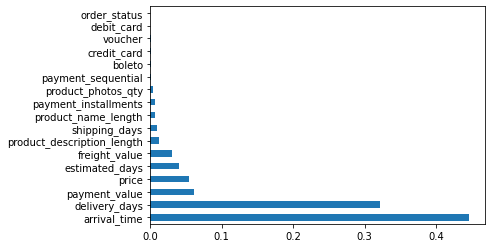

In [483]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

com esse primeiro teste, de longe, as variaveis de tempo de entrega e atraso da entrega estão influenciando na DECISÃO da avaliação do consumidor.